In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Placement_Data_Full_Class - Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### 1.Replace the NaN values with correct value.And justify why you have chosen the same.

In [3]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df["salary"].fillna(0,inplace=True)

In [5]:
"""# Thoese students are not selected so they are not able to get salary, 
so in that place replace values with 0"""

'# Thoese students are not selected so they are not able to get salary, \nso in that place replace values with 0'

In [6]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### 2. How many of them are not placed? 

In [7]:
df["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [8]:
"67 members are not placed"

'67 members are not placed'

### 3.Find the reason for non placement from the dataset?

In [9]:
"(ssc_p,hsc_p,degree_p,etest_p,mba_p) posible for the placement the avrage of 5 columns should be above 65% "

'(ssc_p,hsc_p,degree_p,etest_p,mba_p) posible for the placement the avrage of 5 columns should be above 65% '

### 4.What kind of relation between  salary and mba_p.

In [10]:
quan=[]
qual=[]
for i in df:
    if df[i].dtype=="O":
        qual.append(i)
    else:
        quan.append(i)

In [11]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [12]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [13]:
df[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [14]:
"""mba_p and salary relation is pasitive corelation and directly proposnal 
and their relation value is 0.139823"""

'mba_p and salary relation is pasitive corelation and directly proposnal \nand their relation value is 0.139823'

### 5.Which specialization is getting minimum salary?

In [15]:
Min=df[df["salary"]==df["salary"].min()]["specialisation"]


In [16]:
Min

3       Mkt&HR
5      Mkt&Fin
6      Mkt&Fin
9      Mkt&Fin
12      Mkt&HR
        ...   
198     Mkt&HR
201     Mkt&HR
206    Mkt&Fin
208     Mkt&HR
214     Mkt&HR
Name: specialisation, Length: 67, dtype: object

In [17]:
"These 67 specializations are getting minimum salary"

'These 67 specializations are getting minimum salary'

### 6.How many of them getting above 500000 salary?

In [18]:
df[df["salary"]>500000]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [19]:
"These three people are getting above 500000 salary"

'These three people are getting above 500000 salary'

### 7.Test the analysis of variance between etest_p and mba_p at significance level 5%(Make decision using hypothesis testing).

In [20]:
import scipy.stats as stats
stats.f_oneway(df["etest_p"],df["mba_p"])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [21]:
"""# H0-null hypothesis - there is no significant value
# H1-alternative hypothesis - there is significant value
# Here the p value is above 5% so the null hypothesis(H0) is accepted there is no significant value or 
there is no difference between etest_p and mba_p
"""

'# H0-null hypothesis - there is no significant value\n# H1-alternative hypothesis - there is significant value\n# Here the p value is above 5% so the null hypothesis(H0) is accepted there is no significant value or \nthere is no difference between etest_p and mba_p\n'

### 8.Test similarity between the degree_t(Sci&Tech) and specialization(Mkt&HR) with respect to salary at significance level 5%(Make decision using hypothesis testing)

In [22]:
from scipy.stats import ttest_ind

In [23]:
degree_t=df[df["degree_t"]=="Sci&Tech"]["salary"]
specialisation=df[df["specialisation"]=="Mkt&HR"]["salary"]
ttest_ind(degree_t,specialisation)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

In [24]:
"""# H0-null hypothesis - there is no significant value
# H1-alternative hypothesis - there is significant value
# Here the p value is below 5% so the null hypothesis(H1) is accepted there is significant value or 
there is difference between degree_t(Sci&Tech)  and specialization(Mkt&HR) with respect to salary
"""

'# H0-null hypothesis - there is no significant value\n# H1-alternative hypothesis - there is significant value\n# Here the p value is below 5% so the null hypothesis(H1) is accepted there is significant value or \nthere is difference between degree_t(Sci&Tech)  and specialization(Mkt&HR) with respect to salary\n'

### 9.Covert the normal distribution to standard normal distribution for the salary column

C:\Users\Nagendran\AppData\Local\Temp\ipykernel_2468\2108078099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["salary"],kde_kws={"color":"blue"},color="red")


<Axes: xlabel='salary', ylabel='Density'>

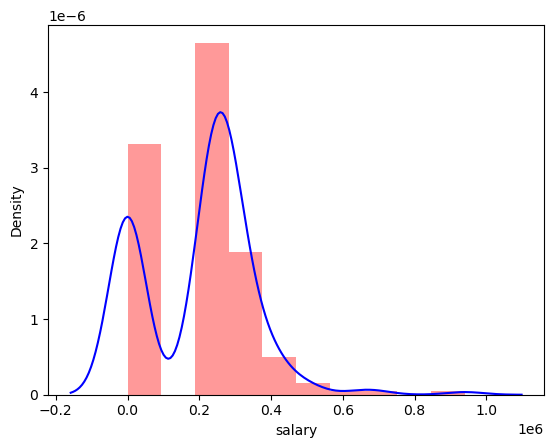

In [25]:
"Normal Distribution for salary column "
sns.distplot(df["salary"],kde_kws={"color":"blue"},color="red")

Mean: 198702.32558139536
Std: 154780.92671560106


C:\Users\Nagendran\AppData\Local\Temp\ipykernel_2468\9841772.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SND,kde_kws={"color":"blue"},color="red")


<Axes: ylabel='Density'>

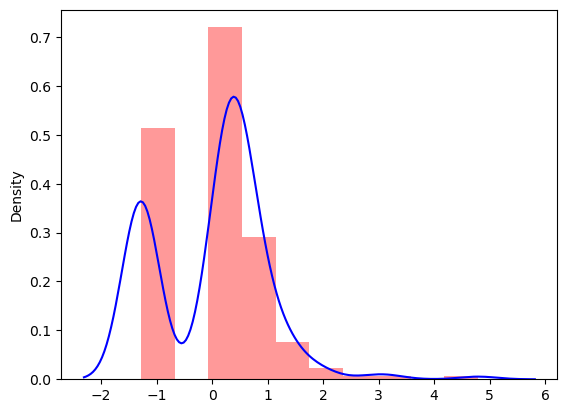

In [26]:
"Standard Normal Distribution"
Mean=df["salary"].mean()
Std=df["salary"].std()
print("Mean:",Mean)
print("Std:",Std)
SND=[(i-Mean)/Std for i in df["salary"]]
sns.distplot(SND,kde_kws={"color":"blue"},color="red")

### 10.What is the probability density function of the salary range from 700000 to 900000

C:\Users\Nagendran\AppData\Local\Temp\ipykernel_2468\1111249132.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["salary"],kde_kws={"color":"blue"},color="yellow")


Mean: 198702.32558139536
Std: 154780.92671560106
Percentage of PDF 0.0003910098948581702


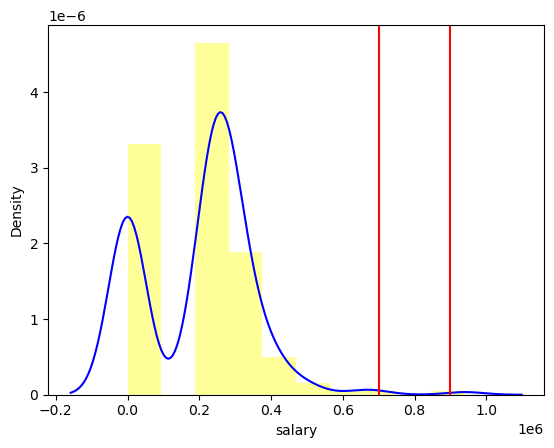

In [27]:
from scipy.stats import norm
sns.distplot(df["salary"],kde_kws={"color":"blue"},color="yellow")
plt.axvline(700000,color="red")
plt.axvline(900000,color="red")
Mean=df["salary"].mean()
Std=df["salary"].std()
normal=norm(Mean,Std)
values=[i for i in df["salary"]]
prob=[normal.pdf(i) for i in values]
sum_prob=sum(prob)
print("Mean:",Mean)
print("Std:",Std)
print("Percentage of PDF",sum_prob)


### 11.Test similarity between degree_t(Skt&Tech) with respect to etest_p and mba_p at significance level 5%(Make decision using hypothesis testing).

In [28]:
etest_p=df[df["degree_t"]=="Sci&Tech"]["etest_p"]
mba_p=df[df["degree_t"]=="Sci&Tech"]["mba_p"]
ttest_ind(etest_p,mba_p)

TtestResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05, df=116.0)

In [29]:
"""# H0-null hypothesis - there is no significant value
# H1-alternative hypothesis - there is significant value
# Here the p value is above 5% so the null hypothesis(H0) is accepted there is no significant value or 
there is no difference in degree_t(Skt&Tech) with respect to etest_p and mba_p
"""

'# H0-null hypothesis - there is no significant value\n# H1-alternative hypothesis - there is significant value\n# Here the p value is above 5% so the null hypothesis(H0) is accepted there is no significant value or \nthere is no difference in degree_t(Skt&Tech) with respect to etest_p and mba_p\n'

### 12. Which parameter is highly co-related with Salary

In [30]:
mf=df[quan].corr()
mf

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [31]:
Max=[]
for i in mf["salary"]:
    if i!=1:
        Max.append(i)
list1=[]
for i in mf.index:
    for j in mf[i]:
        if j==max(Max):
           list1.append(i)
print(list1[0])

ssc_p


In [32]:
"This columns ssc_p is highly co-related with salary"

'This columns ssc_p is highly co-related with salary'